In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
from sklearn import datasets

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modeling
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

In [106]:
df = pd.read_csv("lab10.csv", skipinitialspace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
9994,537224,21361,LOVE LARGE WOOD LETTERS,1.0,12/5/2010 16:24,12.75,13174.0,United Kingdom
9995,537224,22622,BOX OF VINTAGE ALPHABET BLOCKS,2.0,12/5/2010 16:24,9.95,13174.0,United Kingdom
9996,537224,22623,BOX OF VINTAGE JIGSAW BLOCKS,2.0,12/5/2010 16:24,4.95,13174.0,United Kingdom
9997,537224,21363,HOME SMALL WOOD LETTERS,2.0,12/5/2010 16:24,4.95,13174.0,United Kingdom


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9999 non-null   object 
 1   StockCode    9855 non-null   object 
 2   Description  9813 non-null   object 
 3   Quantity     9855 non-null   float64
 4   InvoiceDate  9855 non-null   object 
 5   UnitPrice    9855 non-null   float64
 6   CustomerID   7615 non-null   float64
 7   Country      9855 non-null   object 
dtypes: float64(3), object(5)
memory usage: 625.1+ KB


In [109]:
df = df.sample(frac=1)

In [110]:
df.isnull().sum()

InvoiceNo         0
StockCode       144
Description     186
Quantity        144
InvoiceDate     144
UnitPrice       144
CustomerID     2384
Country         144
dtype: int64

In [111]:
#Parsing Dates
#date_lengths=16 :12/12/2010 12:26
#date_lengths=15 :12/12/2010 8:26
#date_lengths=14 :12/1/2010 8:26
#date_lengths=13 :1/1/2010 8:26
date_lengths = df.InvoiceDate.str.len()
date_lengths.value_counts()

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%m/%d/%Y %H:%M")
df["Invoice_Date"] = df["InvoiceDate"].dt.strftime("%m/%d/%Y")
df["Invoice_Time"] = df["InvoiceDate"].dt.strftime("%H:%M")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
5401,536862,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1.0,2010-12-03 11:13:00,16.98,NaN,United Kingdom,12/03/2010,11:13
1671,536544,22816,CARD MOTORBIKE SANTA,4.0,2010-12-01 14:32:00,0.85,NaN,United Kingdom,12/01/2010,14:32
6959,536982,84997d,PINK 3 PIECE POLKADOT CUTLERY SET,10.0,2010-12-03 14:27:00,8.47,NaN,United Kingdom,12/03/2010,14:27
7203,537011,22139,NaN,-5.0,2010-12-03 15:38:00,0.00,NaN,United Kingdom,12/03/2010,15:38
788,536464,90200A,PURPLE SWEETHEART BRACELET,1.0,2010-12-01 12:23:00,4.25,17968.0,United Kingdom,12/01/2010,12:23


In [112]:
df.drop(columns=['InvoiceDate'], inplace=True)

In [113]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
5401,536862,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1.0,16.98,NaN,United Kingdom,12/03/2010,11:13
1671,536544,22816,CARD MOTORBIKE SANTA,4.0,0.85,NaN,United Kingdom,12/01/2010,14:32
6959,536982,84997d,PINK 3 PIECE POLKADOT CUTLERY SET,10.0,8.47,NaN,United Kingdom,12/03/2010,14:27
7203,537011,22139,NaN,-5.0,0.00,NaN,United Kingdom,12/03/2010,15:38
788,536464,90200A,PURPLE SWEETHEART BRACELET,1.0,4.25,17968.0,United Kingdom,12/01/2010,12:23


In [114]:
df["Description"].unique()

array(['3 HOOK PHOTO SHELF ANTIQUE WHITE', 'CARD MOTORBIKE SANTA',
       'PINK 3 PIECE POLKADOT CUTLERY SET', ...,
       'AMETHYST DIAMANTE EXPANDABLE RING', 'BLUE BIRDHOUSE DECORATION',
       'MURANO STYLE GLASS BRACELET BLACK'], dtype=object)

In [115]:
#Check the number of unique values
for column in df.columns:
    print(f'The number of unique values in {column} is: {df[column].nunique()}')

The number of unique values in InvoiceNo is: 654
The number of unique values in StockCode is: 1959
The number of unique values in Description is: 1922
The number of unique values in Quantity is: 114
The number of unique values in UnitPrice is: 153
The number of unique values in CustomerID is: 322
The number of unique values in Country is: 15
The number of unique values in Invoice_Date is: 4
The number of unique values in Invoice_Time is: 332


In [116]:
#Check the duplicate values in df
print(df.duplicated().sum())
df[df.duplicated()==True]
df = df.drop_duplicates()
print(df.duplicated().sum())

196
0


In [117]:
#Data Cleaing: Missing Value
print(df.isnull().sum())

InvoiceNo          0
StockCode        143
Description      185
Quantity         143
UnitPrice        143
CustomerID      2383
Country          143
Invoice_Date     143
Invoice_Time     143
dtype: int64


In [118]:
# Calculate the mean of 'Quantity' column
mean_Quantity = df['Quantity'].mean()

# Fill null values in 'Maximum Walking distance (km)' with the mean value
df['Quantity'].fillna(mean_Quantity, inplace=True)

In [119]:
# Calculate the mean of 'Quantity' column
mean_UnitPrice = df['UnitPrice'].mean()

# Fill null values in 'Maximum Walking distance (km)' with the mean value
df['UnitPrice'].fillna(mean_UnitPrice, inplace=True)

In [120]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer with 'most_frequent' strategy
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Identify categorical columns with missing values
categorical_columns_with_missing_values = ['Country']

# Impute missing values for each categorical column
for column in categorical_columns_with_missing_values:
    df[column] = categorical_imputer.fit_transform(df[[column]])

In [121]:
df.isnull().sum()

InvoiceNo          0
StockCode        143
Description      185
Quantity           0
UnitPrice          0
CustomerID      2383
Country            0
Invoice_Date     143
Invoice_Time     143
dtype: int64

In [122]:
df.drop(columns=['CustomerID'], inplace=True)

In [123]:
columns_to_check = ['StockCode', 'Invoice_Date','Invoice_Time', 'Description']  # List of columns to check for missing values
df.dropna(subset=columns_to_check, inplace=True)

In [124]:
df.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
UnitPrice       0
Country         0
Invoice_Date    0
Invoice_Time    0
dtype: int64

In [125]:
# Describe numerical features
numerical_features = df.select_dtypes(include='number')
description = numerical_features.describe()


# Display statistical analysis
print("Statistical Analysis:")
print(description)

Statistical Analysis:
          Quantity    UnitPrice
count  9618.000000  9618.000000
mean      8.066438     3.893597
std     106.234513    14.575614
min   -9360.000000     0.000000
25%       1.000000     1.250000
50%       3.000000     2.510000
75%       8.000000     4.210000
max    2880.000000   887.520000


### Visualize Country Column using Countplot

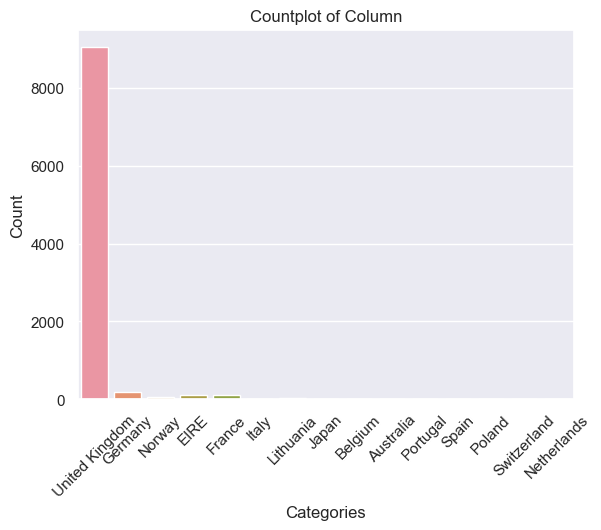

In [126]:
import seaborn as sns
sns.countplot(x='Country', data=df)
plt.title('Countplot of Column')
plt.xlabel('Categories')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.show()

### Visualize Numerical Features using Histogram

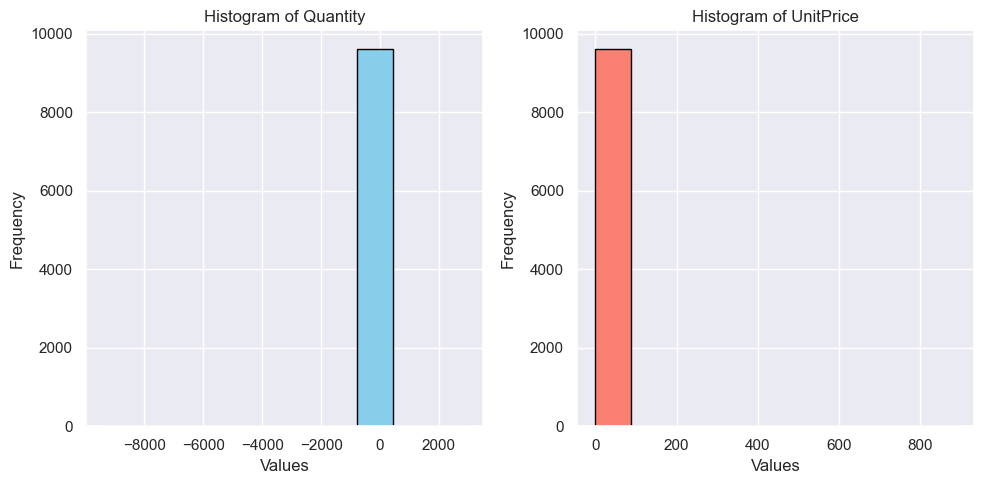

In [127]:
# Assuming 'column1' and 'column2' are the numerical columns you want to visualize
plt.figure(figsize=(10, 5))

# Histogram for column1
plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Quantity')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for column2
plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


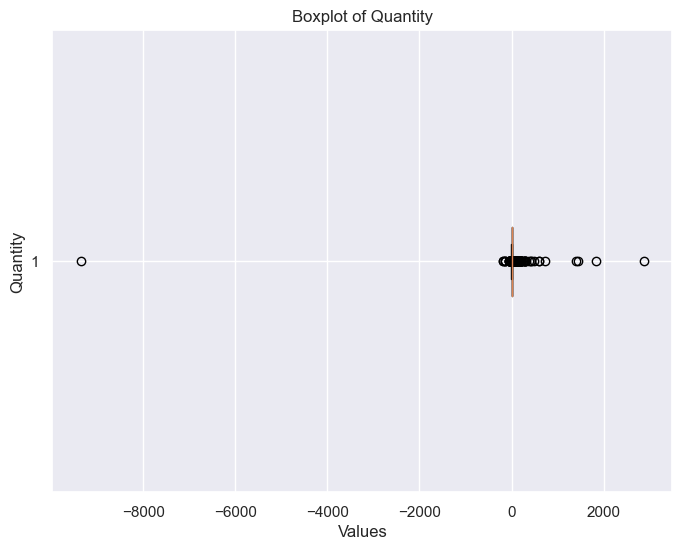

In [128]:
# Assuming 'column_name' is the numeric column you want to visualize
plt.figure(figsize=(8, 6))
plt.boxplot(df['Quantity'], vert=False)  # vert=False for horizontal box plot
plt.title('Boxplot of Quantity')
plt.xlabel('Values')
plt.ylabel('Quantity')
plt.show()


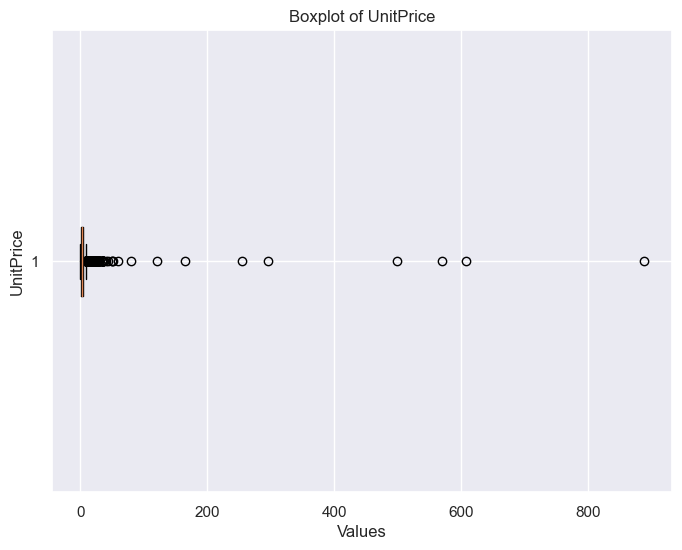

In [129]:
# Assuming 'column_name' is the numeric column you want to visualize
plt.figure(figsize=(8, 6))
plt.boxplot(df['UnitPrice'], vert=False)  # vert=False for horizontal box plot
plt.title('Boxplot of UnitPrice')
plt.xlabel('Values')
plt.ylabel('UnitPrice')
plt.show()


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9618 entries, 5401 to 8995
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   InvoiceNo     9618 non-null   object 
 1   StockCode     9618 non-null   object 
 2   Description   9618 non-null   object 
 3   Quantity      9618 non-null   float64
 4   UnitPrice     9618 non-null   float64
 5   Country       9618 non-null   object 
 6   Invoice_Date  9618 non-null   object 
 7   Invoice_Time  9618 non-null   object 
dtypes: float64(2), object(6)
memory usage: 676.3+ KB


In [131]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['InvoiceNo'] = le.fit_transform(df.InvoiceNo)
df['StockCode'] = le.fit_transform(df.StockCode)
df['Description'] = le.fit_transform(df.Description)
df['Country'] = le.fit_transform(df.Country)
df['Invoice_Date'] = le.fit_transform(df.Invoice_Date)
df['Invoice_Time'] = le.fit_transform(df.Invoice_Time)


In [132]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [133]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Define a range of clusters to try
min_clusters = 2
max_clusters = 10

# Initialize lists to store silhouette scores for both methods
kmeans_silhouette_scores = []
hierarchical_silhouette_scores = []

# Iterate through different numbers of clusters
for n_clusters in range(min_clusters, max_clusters+1):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette score for KMeans
    silhouette_avg_kmeans = silhouette_score(data_scaled, kmeans_labels)
    kmeans_silhouette_scores.append(silhouette_avg_kmeans)
    
    # Fit Hierarchical clustering model
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    hierarchical_labels = hierarchical.fit_predict(data_scaled)
    
    # Calculate silhouette score for Hierarchical clustering
    silhouette_avg_hierarchical = silhouette_score(data_scaled, hierarchical_labels)
    hierarchical_silhouette_scores.append(silhouette_avg_hierarchical)

# Find the best number of clusters for KMeans
best_n_clusters_kmeans = range(min_clusters, max_clusters+1)[np.argmax(kmeans_silhouette_scores)]
best_score_kmeans = np.max(kmeans_silhouette_scores)

# Find the best number of clusters for Hierarchical clustering
best_n_clusters_hierarchical = range(min_clusters, max_clusters+1)[np.argmax(hierarchical_silhouette_scores)]
best_score_hierarchical = np.max(hierarchical_silhouette_scores)

print("Best number of clusters (KMeans):", best_n_clusters_kmeans)
print("Best silhouette score (KMeans):", best_score_kmeans)
print("Best number of clusters (Hierarchical):", best_n_clusters_hierarchical)
print("Best silhouette score (Hierarchical):", best_score_hierarchical)


c:\Users\razan\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\razan\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\razan\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\razan\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\razan\anaconda33\lib\site-packages\sklearn\

Best number of clusters (KMeans): 5
Best silhouette score (KMeans): 0.2952551777407655
Best number of clusters (Hierarchical): 5
Best silhouette score (Hierarchical): 0.28619985933688047


In [134]:
# KMeans Clustering model


# Apply KMeans Clustering
kmeans = KMeans(n_clusters=5,  random_state = 42)  # You can choose the number of clusters
kmeans_labels = kmeans.fit_predict(data_scaled)


# Save the predictions as a column
df['kmeans']=kmeans_labels

# Check the distribution
df['kmeans'].value_counts()


c:\Users\razan\anaconda33\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1    4888
2    4235
0     490
4       4
3       1
Name: kmeans, dtype: int64

In [135]:
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 5)

# Fit and predict on the data
df_hc = hc.fit_predict(data_scaled)

# Save the predictions as a column
df['df_hc']=df_hc

# Check the distribution
df['df_hc'].value_counts()

0    4910
1    4140
2     563
4       4
3       1
Name: df_hc, dtype: int64

In [136]:
from sklearn.metrics import silhouette_score

# Evaluate clustering performance using silhouette score
kmeans_score = silhouette_score(data_scaled, kmeans_labels)
hierarchical_score = silhouette_score(data_scaled, df_hc)

print("Silhouette Score:")
print("KMeans:", kmeans_score)
print("Hierarchical:", hierarchical_score)

# Conclude the best performing clustering model
best_model = max([(kmeans_score, 'KMeans'), (hierarchical_score, 'Hierarchical')])

print("Best performing clustering model:", best_model[1])


Silhouette Score:
KMeans: 0.2952551777407655
Hierarchical: 0.28619985933688047
Best performing clustering model: KMeans


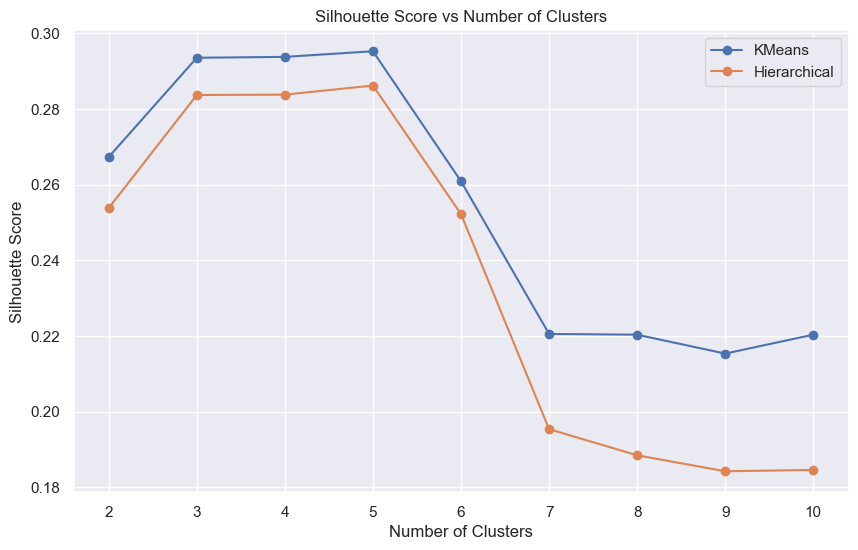

In [137]:
# Plot silhouette scores for each method
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters+1), kmeans_silhouette_scores, label='KMeans', marker='o')
plt.plot(range(min_clusters, max_clusters+1), hierarchical_silhouette_scores, label='Hierarchical', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

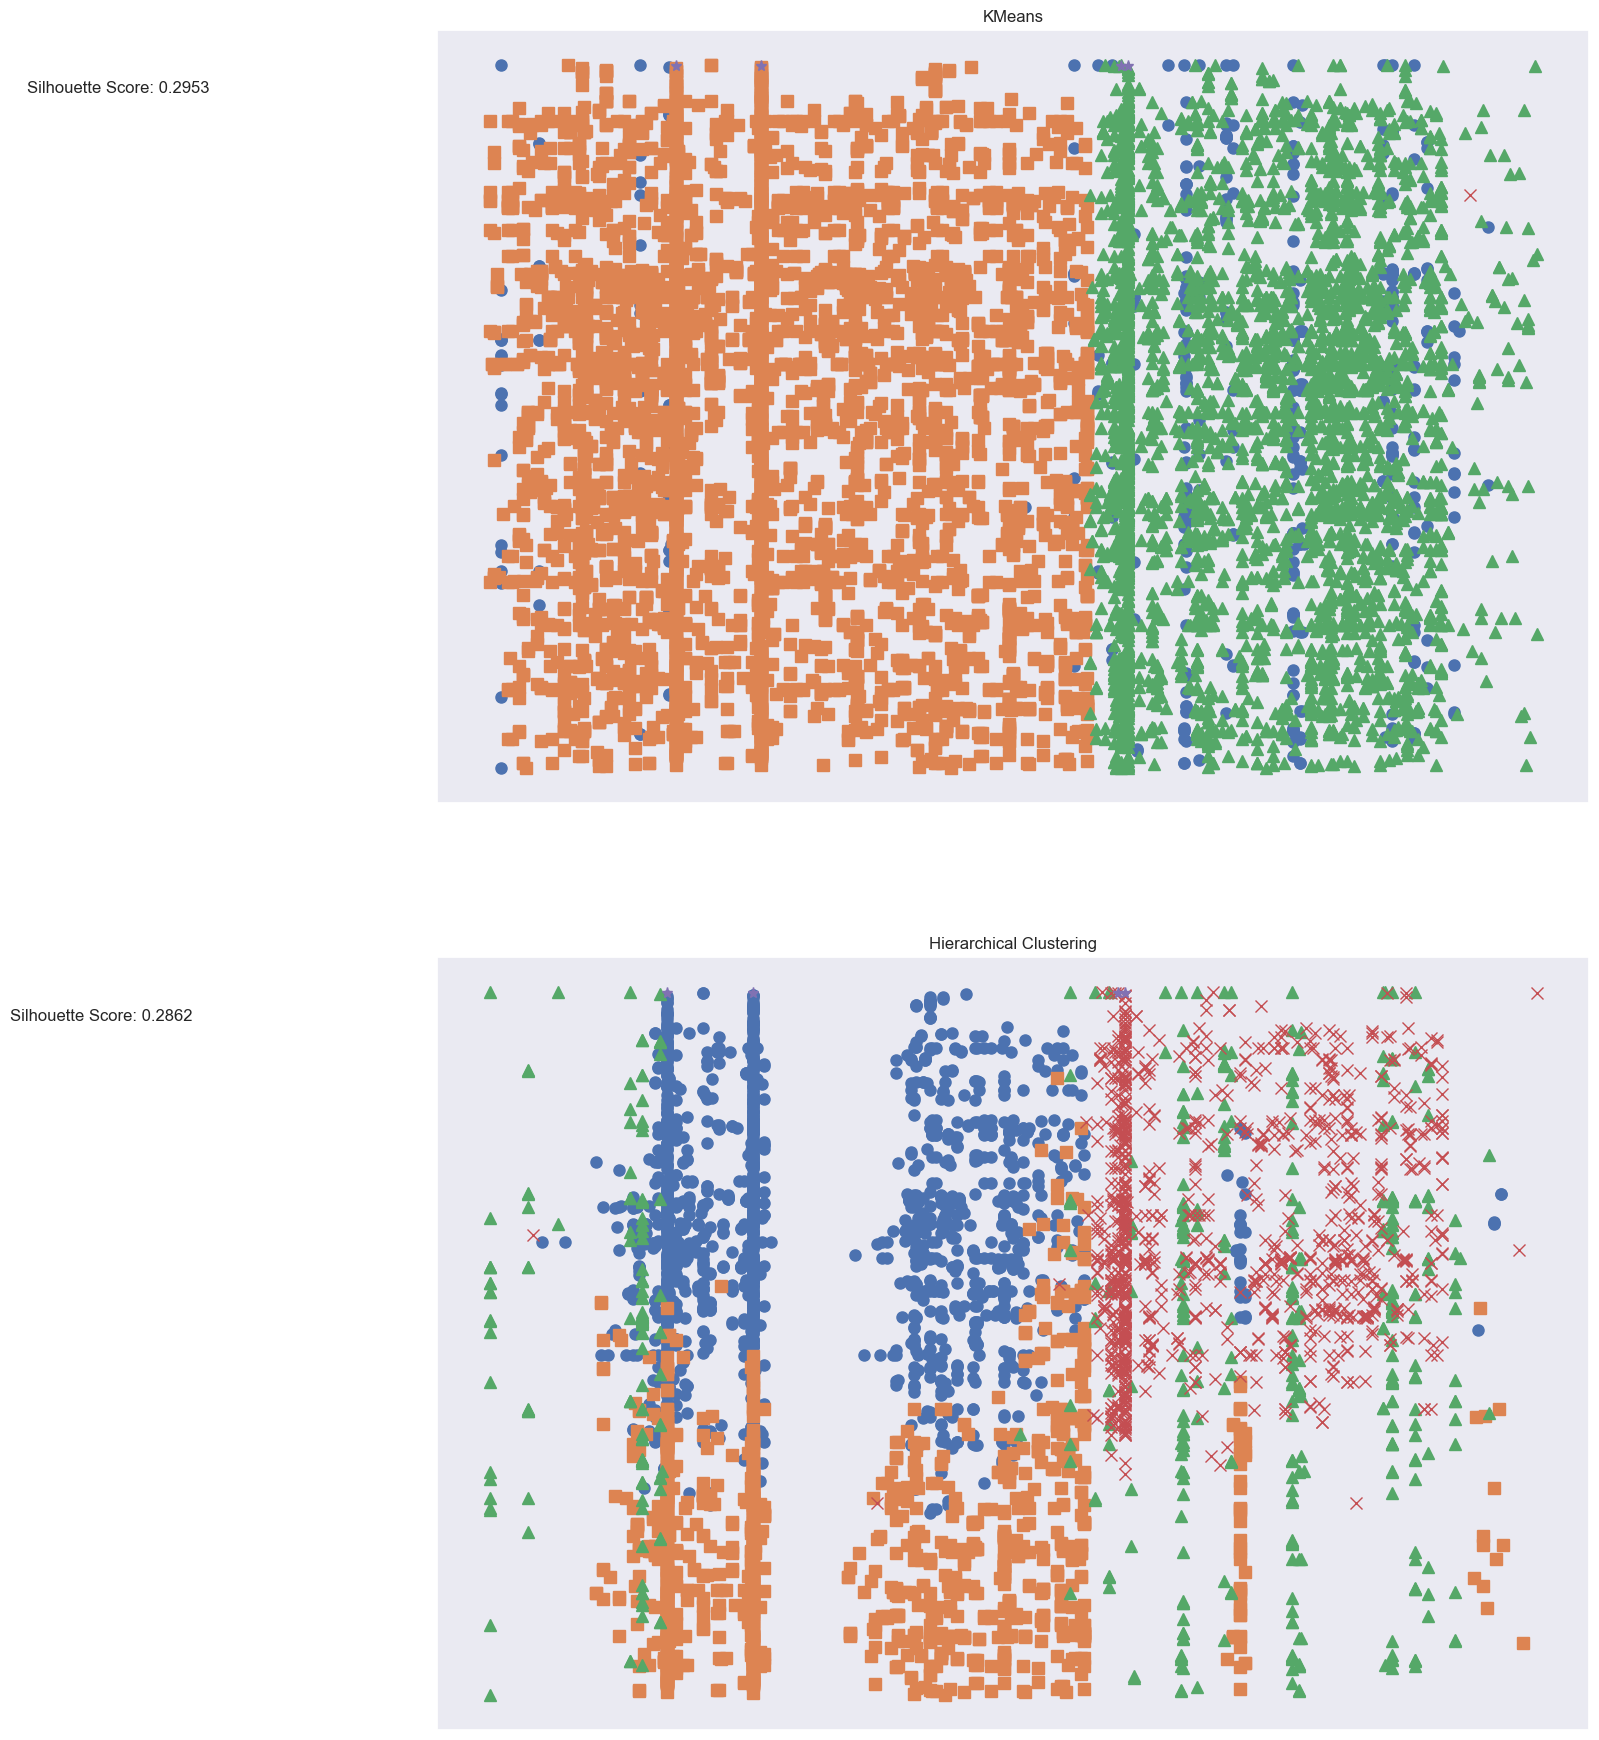

In [149]:
import matplotlib.pyplot as plt

# Define shapes for each cluster
markers = ['o', 's', '^', 'x', '*']

# Plot result
fig, axs = plt.subplots(2, 1, figsize=(12, 20))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)

# KMeans
ax = axs[0]
for k, col in zip(range(5), markers):
    my_members = kmeans_labels == k
    ax.plot(data_scaled[my_members, 0], data_scaled[my_members, 1], marker=markers[k], linestyle='', markersize=8)
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
ax.text(-3.5, 1.8,  'Silhouette Score: %.4f' % kmeans_score)  # Corrected

# Hierarchical Clustering
ax = axs[1]
for k, col in zip(range(5), markers):
    my_members = hierarchical_labels == k
    ax.plot(data_scaled[my_members, 0], data_scaled[my_members, 1], marker=markers[k], linestyle='', markersize=8)
    ax.set_title('Hierarchical Clustering')
    ax.set_xticks(())
    ax.set_yticks(())
ax.text(-3.5, 1.8, 'Silhouette Score: %.4f' % hierarchical_score)

plt.show()